In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, lambdify
from sympy.plotting import plot

# evenly sampled time at 200ms intervals
n = np.arange(0, 100, 1)
SPLIT = False
SHOW_TEXT = False
NAMES = "PROV", "PROV-Dictionary", "Versioned-PROV"

# Comparison

## List Definition

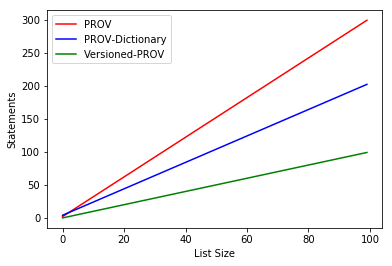

In [2]:
def list_definition(ax, show_text=True, split=True):
    N = symbols("n")
    prov_nodes = N + 1
    prov_edges = 2*N + 1
    dic_nodes = N + 1 + 1
    dic_edges = N + 2
    ver_nodes = 0*N
    ver_edges = N
        
    
    colors = "r", "b", "g"
    nodes = prov_nodes, dic_nodes, ver_nodes
    edges = prov_edges, dic_edges, ver_edges
    delta_edges = (-25, -5), (-35, -6), (-30, -40)
    delta_nodes = (-17, -30), (-25, 5), (-10, 7)
    
    if split:
        main_loops = [
            (edges, delta_edges, "{} edges", "{}"),
            (nodes, delta_nodes, "{} nodes", "{}--"),
        ]
    else:
        addeq = (x + y for x, y in zip(nodes, edges))
        deltas = [(-17, -3), (-13, 8), (-3, 5)]
        main_loops = [
            (addeq, deltas, "{}", "{}"),
        ]

    for elements, deltas, text, colormod in main_loops:
        for name, eq, color, delta in zip(NAMES, elements, colors, deltas):
            fn = lambdify((N,), eq, 'numpy')
            ax.plot(n, n*0 + fn(n), colormod.format(color), label=text.format(name))
            if show_text:
                x = n[-1]
                y = fn(x)
                dx, dy = delta
                ax.text(x + dx, y + dy, text.format(eq), fontsize=10, color=color)
    
    ax.set_xlabel("List Size")
    ax.set_ylabel("Statements")


fig1 = plt.figure()
ax = fig1.add_subplot(111)
list_definition(ax, SHOW_TEXT, SPLIT)
plt.legend()
plt.savefig("../generated/comparison/list.svg")
plt.savefig("../generated/comparison/list.png")
plt.savefig("../generated/comparison/list.pdf")

plt.show()

## Reference assignment


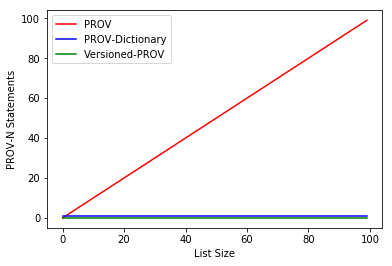

In [3]:
def reference_assignment(ax, show_text=True, split=True):
    N = symbols("n")
    prov_edges = N
    dic_edges = 0*N + 1
    ver_edges = 0*N
        
    colors = "r", "b", "g"
    edges = prov_edges, dic_edges, ver_edges
    
    if split:
        delta_edges = (-17, -3), (-15, 4), (-15, -5)
        main_loops = [
            (edges, delta_edges, "{} edges", "{}"),
        ]
    else:
        delta_edges = (-3, 1), (-3, 4), (-3, -5)
        main_loops = [
            (edges, delta_edges, "{}", "{}"),
        ]

    for elements, deltas, text, colormod in main_loops:
        for name, eq, color, delta in zip(NAMES, elements, colors, deltas):
            fn = lambdify((N,), eq, 'numpy')
            ax.plot(n, n*0 + fn(n), colormod.format(color), label=text.format(name))
            if show_text:
                x = n[-1]
                y = fn(x)
                dx, dy = delta
                ax.text(x + dx, y + dy, text.format(eq), fontsize=10, color=color)
    
    ax.set_xlabel("List Size")
    ax.set_ylabel("PROV-N Statements")

fig1 = plt.figure()
ax = fig1.add_subplot(111)
reference_assignment(ax, SHOW_TEXT, SPLIT)
plt.legend()
plt.savefig("../generated/comparison/assign.svg")
plt.savefig("../generated/comparison/assign.png")
plt.savefig("../generated/comparison/assign.pdf")
plt.show()

## Both

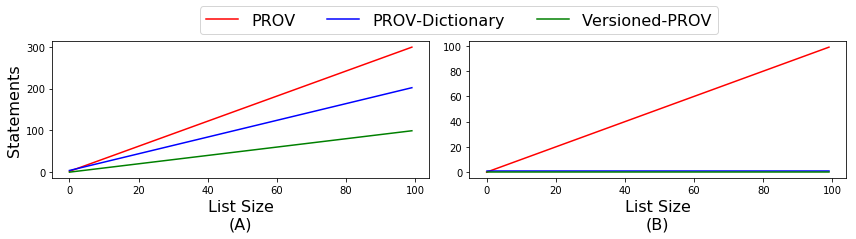

In [4]:
f, (ax0, ax1) = plt.subplots(1, 2, sharey=False)
list_definition(ax0, SHOW_TEXT, SPLIT)
reference_assignment(ax1, SHOW_TEXT, SPLIT)
lgd = ax0.legend(
        loc='center', ncol=6 if SPLIT else 3,
        bbox_to_anchor=(1.08, 1.15), fontsize=16)

ax0.set_ylabel("Statements", fontsize=16)
ax0.set_xlabel("List Size\n(A)", fontsize=16)
ax1.set_ylabel("")
ax1.set_xlabel("List Size\n(B)", fontsize=16)
f.set_size_inches(12, 3)
plt.tight_layout()
plt.savefig("../generated/paper/comp_list_and_assign.svg", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig("../generated/paper/comp_list_and_assign.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig("../generated/paper/comp_list_and_assign.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## Assignment to part of structures


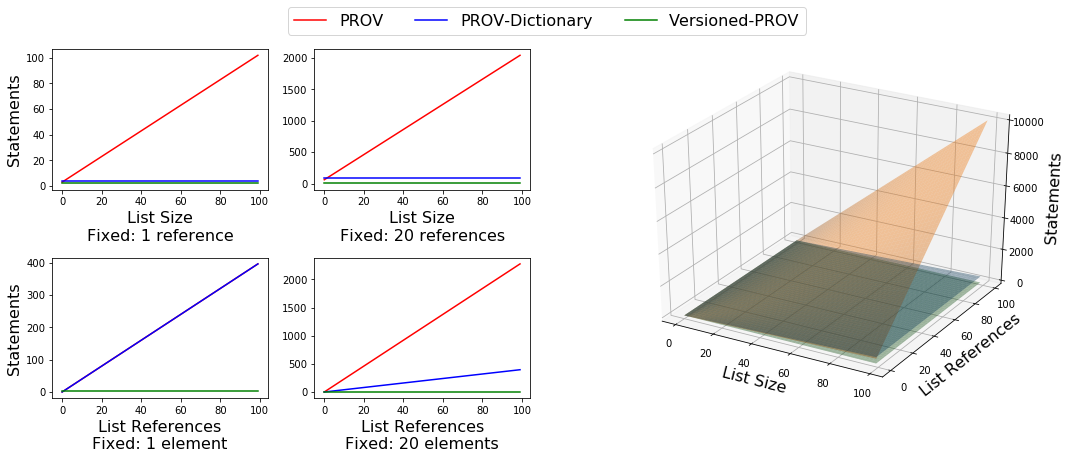

In [5]:
from mpl_toolkits.mplot3d import Axes3D
R, N = symbols("r n")
prov_nodes = R + N*0
dic_nodes = R + N*0
ver_nodes = N*0
prov_edges = R * N + 2 * R
dic_edges = 3 * R + N*0
ver_edges = 2 + R*0 + N*0
colors = "r", "b", "g"
nodes = prov_nodes, dic_nodes, ver_nodes
edges = prov_edges, dic_edges, ver_edges



def use_xy(fn, params, k, delta):
    x, z = params(n[-1])
    y = fn(x, z)
    dx, dy = delta
    return x + dx, y + dy

def use_zy(fn, params, k, delta):
    x, z = params(n[-1])
    y = fn(x, z)
    dx, dy = delta
    return z + dx, y + dy

def part_assign(ax, params, use=use_xy, show_text=True, split=True, xlabel="List Size", ylabel="Statements", delta_nodes=[], delta_edges=[], delta_sum=[]):
    delta_edges = delta_edges or ((-45, -5), (-35, 34), (-20, 13))
    delta_nodes = delta_nodes or ((-19, 30), (-19, 23), (-20, 7))
    
    if split:
        main_loops = [
            (edges, delta_edges, "{} edges", "{}"),
            (nodes, delta_nodes, "{} nodes", "{}--"),
        ]
    else:
        addeq = (x + y for x, y in zip(nodes, edges))
        delta_sum = delta_sum or [(-17, -3), (-13, 8), (-3, 5)]
        main_loops = [
            (addeq, delta_sum, "{}", "{}"),
        ]

    for elements, deltas, text, colormod in main_loops:
        for name, eq, color, delta in zip(NAMES, elements, colors, deltas):
            fn = lambdify((N, R), eq, 'numpy')
            ax.plot(n, n*0 + fn(*params(n)), colormod.format(color), label=text.format(name))
            if show_text:
                ax.text(*use(fn, params, n[-1], delta), text.format(eq), fontsize=10, color=color)
    
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)


def prov(n, r, count, color, axis=[]):
    return axis + [count * (4 + (r * n + 3 * r)), color]

def dic(n, r, count, color, axis=[]):
    return axis + [count * (4  + (3 * r + 1 + n * 0)), color]

def ver(n, r, count, color, axis=[]):
    return axis + [count * (4  + (2 + n * 0 + r * 0)), color]

f, (
    (ax00, ax01, ax02, ax03),
    (ax10, ax11, ax12, ax13),
) = plt.subplots(2, 4, sharey=False)


part_assign(
    ax00, (lambda x: (x, 1)),
    xlabel="List Size\nFixed: 1 reference",
    delta_nodes=[(-19, 30), (-19, 23), (-20, 7)],
    delta_edges=[(-50, -5), (-35, 34), (-20, 13)],
    delta_sum=[(-30, -3), (-18, 15), (-3, 7)],
    split=SPLIT, show_text=SHOW_TEXT
)

part_assign(
    ax01, (lambda x: (x, 20)),
    xlabel="List Size\nFixed: 20 references", ylabel="",
    delta_nodes=[(-19, 30 * 20), (-19, 23 * 20), (-20, 7 * 20)],
    delta_edges=[(-50, -5 * 20), (-35, 35 * 20), (-20, 15 * 20)],
    delta_sum=[(-30, -3 * 20), (-18, 15 * 20), (-3, 7 * 20)],
    split=SPLIT, show_text=SHOW_TEXT
)

part_assign(
    ax10, (lambda x: (1, x)), use=use_zy,
    xlabel="List References\nFixed: 1 element",
    delta_nodes=[(-19, 30), (-19, 12), (-20, 8)],
    delta_edges=[(-58, -40), (-45, -15),  (-20, 30)],
    delta_sum=[(-37, -40), (-27, -15), (-3, 10)],
    split=SPLIT, show_text=SHOW_TEXT
)

part_assign(
    ax11, (lambda x: (20, x)), use=use_zy,
    xlabel="List References\nFixed: 20 elements", ylabel="",
    delta_nodes=[(-19, 400), (-19, 200), (-20, -100)],
    delta_edges=[(-47, -100), (-70, -50),  (-20, 100)],
    delta_sum=[(-30, -100), (-18, 150), (-3, 100)],
    split=SPLIT, show_text=SHOW_TEXT
)

ax02.axis('off')
ax03.axis('off')
ax12.axis('off')
ax13.axis('off')



dic = lambdify((N, R), dic_nodes + dic_edges, 'numpy')
prov = lambdify((N, R), prov_nodes + prov_edges, 'numpy')
ver = lambdify((N, R), ver_nodes + ver_edges, 'numpy')


_r, _n = np.meshgrid(np.arange(0, 100, 1), n)
ax3 = f.add_subplot(122, projection='3d')
ax3.plot_surface(_r, _n, dic(_n, _r), alpha=0.4)
ax3.plot_surface(_r, _n, prov(_n, _r), alpha=0.4)
ax3.plot_surface(_r, _n, ver(_n, _r), alpha=0.4)
ax3.set_xlabel("List Size", fontsize=16)
ax3.set_ylabel("List References", fontsize=16)
ax3.set_zlabel("\nStatements", fontsize=16)


lgd = ax01.legend(
    loc='center', ncol=6 if SPLIT else 3,
    bbox_to_anchor=(1.08, 1.2), fontsize=16)


f.set_size_inches(15, 6)
plt.tight_layout()
plt.savefig("../generated/comparison/part.svg", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig("../generated/comparison/part.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig("../generated/comparison/part.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()